In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
exchange = pd.read_csv("euro-daily-hist_1999_2022.csv")

### Storytelling Data Visualization on Exchange Rates

there are two types of data visualization:
 * Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
 * Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [3]:
exchange.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [4]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [5]:
exchange.rename(columns = {'[US dollar ]': 'US_dollar','Period\\Unit:' : 'Time'}, inplace=True )

In [6]:
exchange["Time"] = pd.to_datetime(exchange["Time"])

In [7]:
exchange.sort_values('Time' , inplace = True)

In [8]:
exchange.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [9]:
euro_to_dollar = exchange[['Time', 'US_dollar']].copy()

In [10]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

In [11]:
euro_to_dollar =  euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] =euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


# ROLLING MEAN

In [12]:
import matplotlib.pyplot as plt

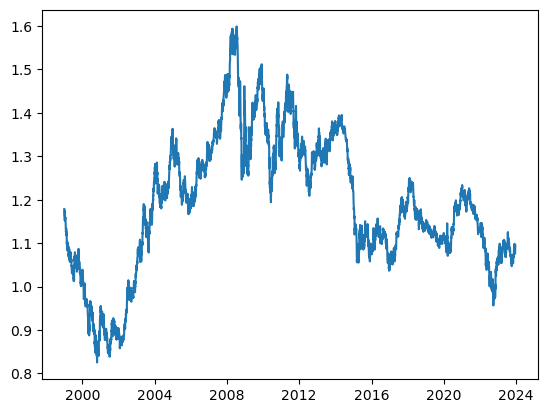

In [13]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar["US_dollar"])
plt.show()
                                               

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

In [14]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [15]:
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


In [16]:
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()

values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


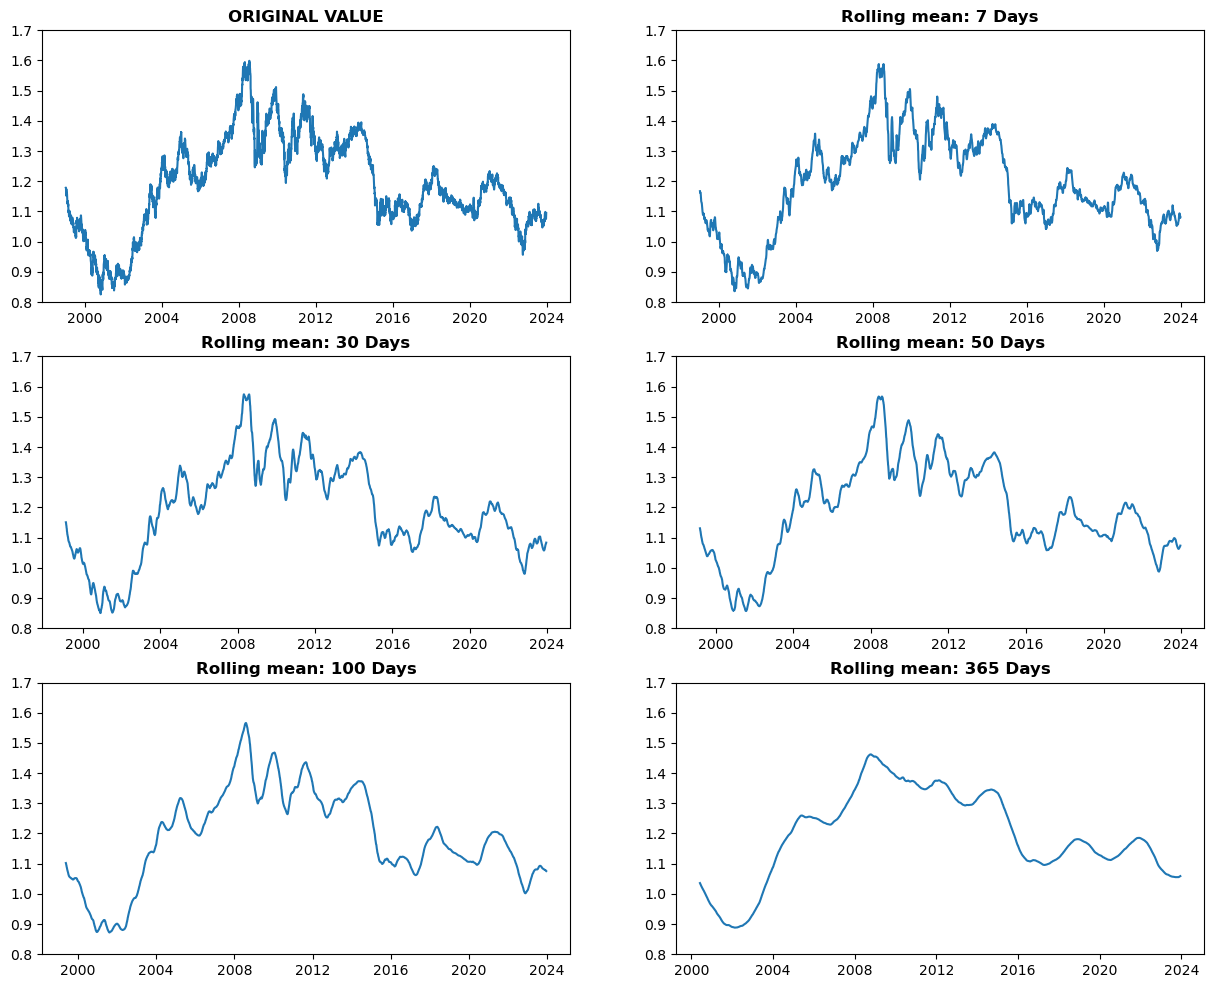

In [17]:

plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title("ORIGINAL VALUE" , weight = 'bold')
plt.ylim(0.8,1.7)

    
for i , rolling in zip([2,3,4,5,6],[7,30,50,100,365]):

    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'].rolling(rolling).mean()) 
    plt.title("Rolling mean: " + str(rolling) + " Days" , weight = 'bold')
    plt.ylim(0.8,1.7)
    
plt.tight_layout
plt.show()

 # COMING UP WITH AN IDEA
 
 Here are a few story ideas  for our data:
 
 * We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show 2020 data and the 2016-2019 data as a baseline. We can use a line plot
 
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot

* We show comparatively how the euro-dollar changed under the last three US presidents (George W.Bush (2001-2009),Barack Obama (2009-2017) and Donald trump(2017-2021)). We can use a line plot.

In [18]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


# Story telling Visiualzation

**Financial Crisis 2007-2008**


In [19]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]

financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]


                                                                                  

In [20]:
financial_crisis 

,Time,US_dollar,rolling_mean
4630,2006-01-02,1.1826,1.183087
4629,2006-01-03,1.1875,1.183300
4628,2006-01-04,1.2083,1.184573
4627,2006-01-05,1.2088,1.185613
4626,2006-01-06,1.2093,1.186647
...,...,...,...
3592,2009-12-24,1.4398,1.477640
3590,2009-12-28,1.4405,1.476097
3589,2009-12-29,1.4433,1.474323
3588,2009-12-30,1.4338,1.472533


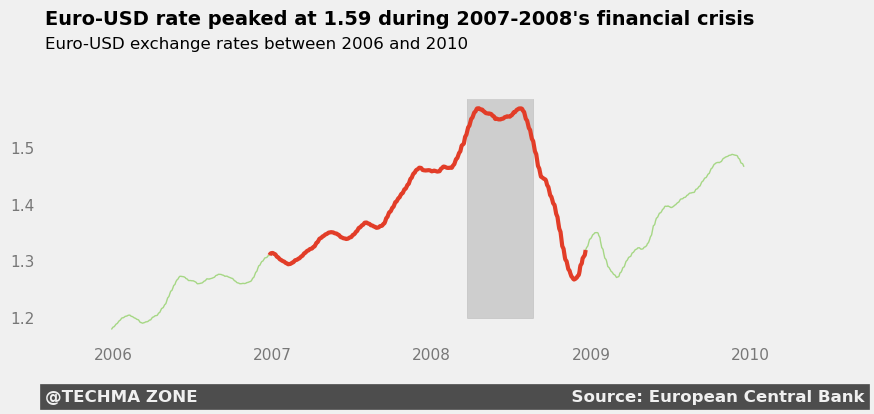

In [21]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("fivethirtyeight")


fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

ax.grid(True, color='grey', linestyle='-', linewidth=0.5)

ax.set_xticks([])  # Remove x-axis tick marks completely
ax.set_yticks([])  # Remove y-axis tick marks completely


x = 0.02
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x , -0.08, year , alpha =0.5 , fontsize=11, transform =plt.gca().transAxes)
    x += 0.22888
    
    
    
y = 0.07

for rate in ['1.2','1.3','1.4','1.5']:
    ax.text(-0.1, y , rate , alpha = 0.5 , fontsize = 11,transform =plt.gca().transAxes)
    y += 0.2333
    
    
    
ax.text(-0.05 , 1.3 , "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight = 'bold' , transform =plt.gca().transAxes)    
ax.text(-0.05 , 1.2 , "Euro-USD exchange rates between 2006 and 2010", fontsize = 12 , transform =plt.gca().transAxes)    
   
    
ax.text(-0.05 , -0.25 , "@TECHMA ZONE" + " "*65 + 'Source: European Central Bank',
        weight = 'bold', color = '#f0f0f0', backgroundcolor = '#4d4d4d', fontsize = 12 , transform =plt.gca().transAxes)    
  
ax.axvspan(xmin = pd.to_datetime("2008-04-1") , xmax = pd.to_datetime("2008-09-1"), ymin = 0.09,
           alpha = 0.3 , color = 'grey')    
    
plt.tight_layout
plt.show()

During the 2007-2008 financial crisis, the euro-USD exchange rate was affected by economic uncertainty, financial market instability, and global recession. Investors sought refuge in the US dollar, strengthening it against the euro. Central bank actions,such as interest rate cuts and liquidity injections, aimed at stabilizing financial markets and restoring confidence, also influenced currency values. Concerns over sovereign debt within the eurozone also impacted the euro's stability, contributing to exchange rate fluctuations.

Thus the 2007-2008 financial crisis caused a mix of economic, financial, and policy factors to impact the euro-USD exchange rate.

# **COVID 19**

In [22]:
 corona_crisis_20 = euro_to_dollar.loc[(euro_to_dollar["Time"]>= '2020-01-01') &
    ( euro_to_dollar["Time"] <= '2020-12-31')]
    
    
corona_crisis = euro_to_dollar.loc[(euro_to_dollar["Time"]>= '2016-01-01') &
    ( euro_to_dollar["Time"] <= '2019-12-31')]   

In [23]:
corona_crisis['rolling_mean'].value_counts(bins = 5).sort_index()

(1.0510000000000002, 1.089]    146
(1.089, 1.126]                 354
(1.126, 1.162]                 257
(1.162, 1.199]                 179
(1.199, 1.236]                  86
Name: rolling_mean, dtype: int64

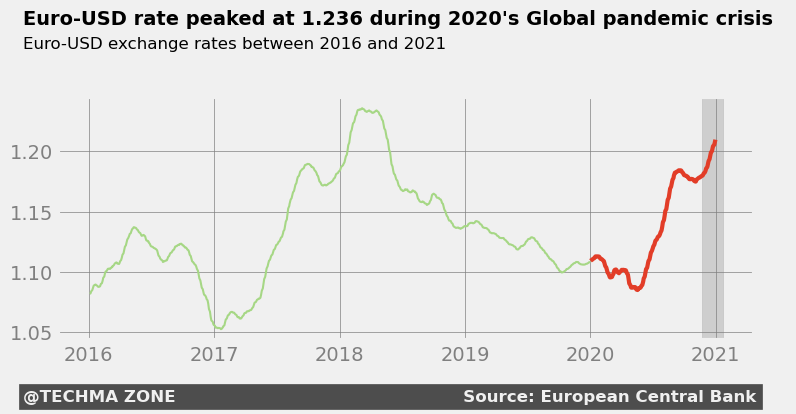

In [24]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("fivethirtyeight")


fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(corona_crisis['Time'], corona_crisis['rolling_mean'],
        linewidth=1.5, color='#A6D785')

ax.plot(corona_crisis_20['Time'], corona_crisis_20['rolling_mean'],
        linewidth=3, color='#e23d28')

ax.grid(True, color='grey', linestyle='-', linewidth=0.5)

#ax.set_xticks([])  # Remove x-axis tick marks completely
ax.tick_params(axis='x', which='both', colors='grey')
ax.tick_params(axis='y', which='both', colors='grey')


x = 0.02
#for year in ['2016','2017','2018','2019','2020','2021']:
 #   ax.text(x , -0.08, year , alpha =0.5 , fontsize=11, transform =plt.gca().transAxes)
   # x += 0.183
    
    
ax.text(-0.05 , 1.3 , "Euro-USD rate peaked at 1.236 during 2020's Global pandemic crisis  ",
        weight = 'bold' , transform =plt.gca().transAxes)    
ax.text(-0.05 , 1.2 , "Euro-USD exchange rates between 2016 and 2021", fontsize = 12 , transform =plt.gca().transAxes)    
   
    
ax.text(-0.05 , -0.25 , "@TECHMA ZONE" + " "*50+ 'Source: European Central Bank',
        weight = 'bold', color = '#f0f0f0', backgroundcolor = '#4d4d4d', fontsize = 12 , transform =plt.gca().transAxes)    
  
ax.axvspan(xmin = pd.to_datetime("2021-01-21") , xmax = pd.to_datetime("2020-11-21"), ymin = 0.01,
           alpha = 0.3 , color = 'grey')    
    
plt.tight_layout
plt.show()

The Euro-USD exchange rate experienced significant fluctuations during the COVID-19 pandemic for several reasons as it is clearly visible in the above plot.The reasons included:

Economic uncertainty from widespread disruption led investors to seek safety in the US dollar, driving up its demand and weakening the euro. Furthermore, the flight to safety phenomenon saw investors flocking to the US dollar as a refuge during the crisis, further dampening the euro's strength. Trade disruptions caused by lockdowns also impacted currency exchange rates, affecting the balance of trade between the eurozone and the United States. Changes in trade flows can influence currency exchange rates. Central bank actions, including interest rate cuts and stimulus measures impacted the relative strength of the US dollar compared to the euro, further shaped currency values during this turbulent period.

 # **The Three US-Presidents Example**

In [25]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2021)]

bush = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year < 2009]

obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009) &  (bush_obama_trump['Time'].dt.year <= 2017)]

trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]


Below, you'll notice we used matplotlib's functional approach to build the graphy. We use this apporach because it offers more flexibility in arranging the
subplots:
    
    - We first build three of the graphs on a 2-by-3 grid (this should have six subplots, but we only build three; the bottom row remains empty).
    
    - We then build only the bottom graphy of 2-by-1 grid (this grid should have two subplots; the top row remains empty).
    
    - The two grids are merged and we end up with three graphs on the top row and one graph on the bottom row.

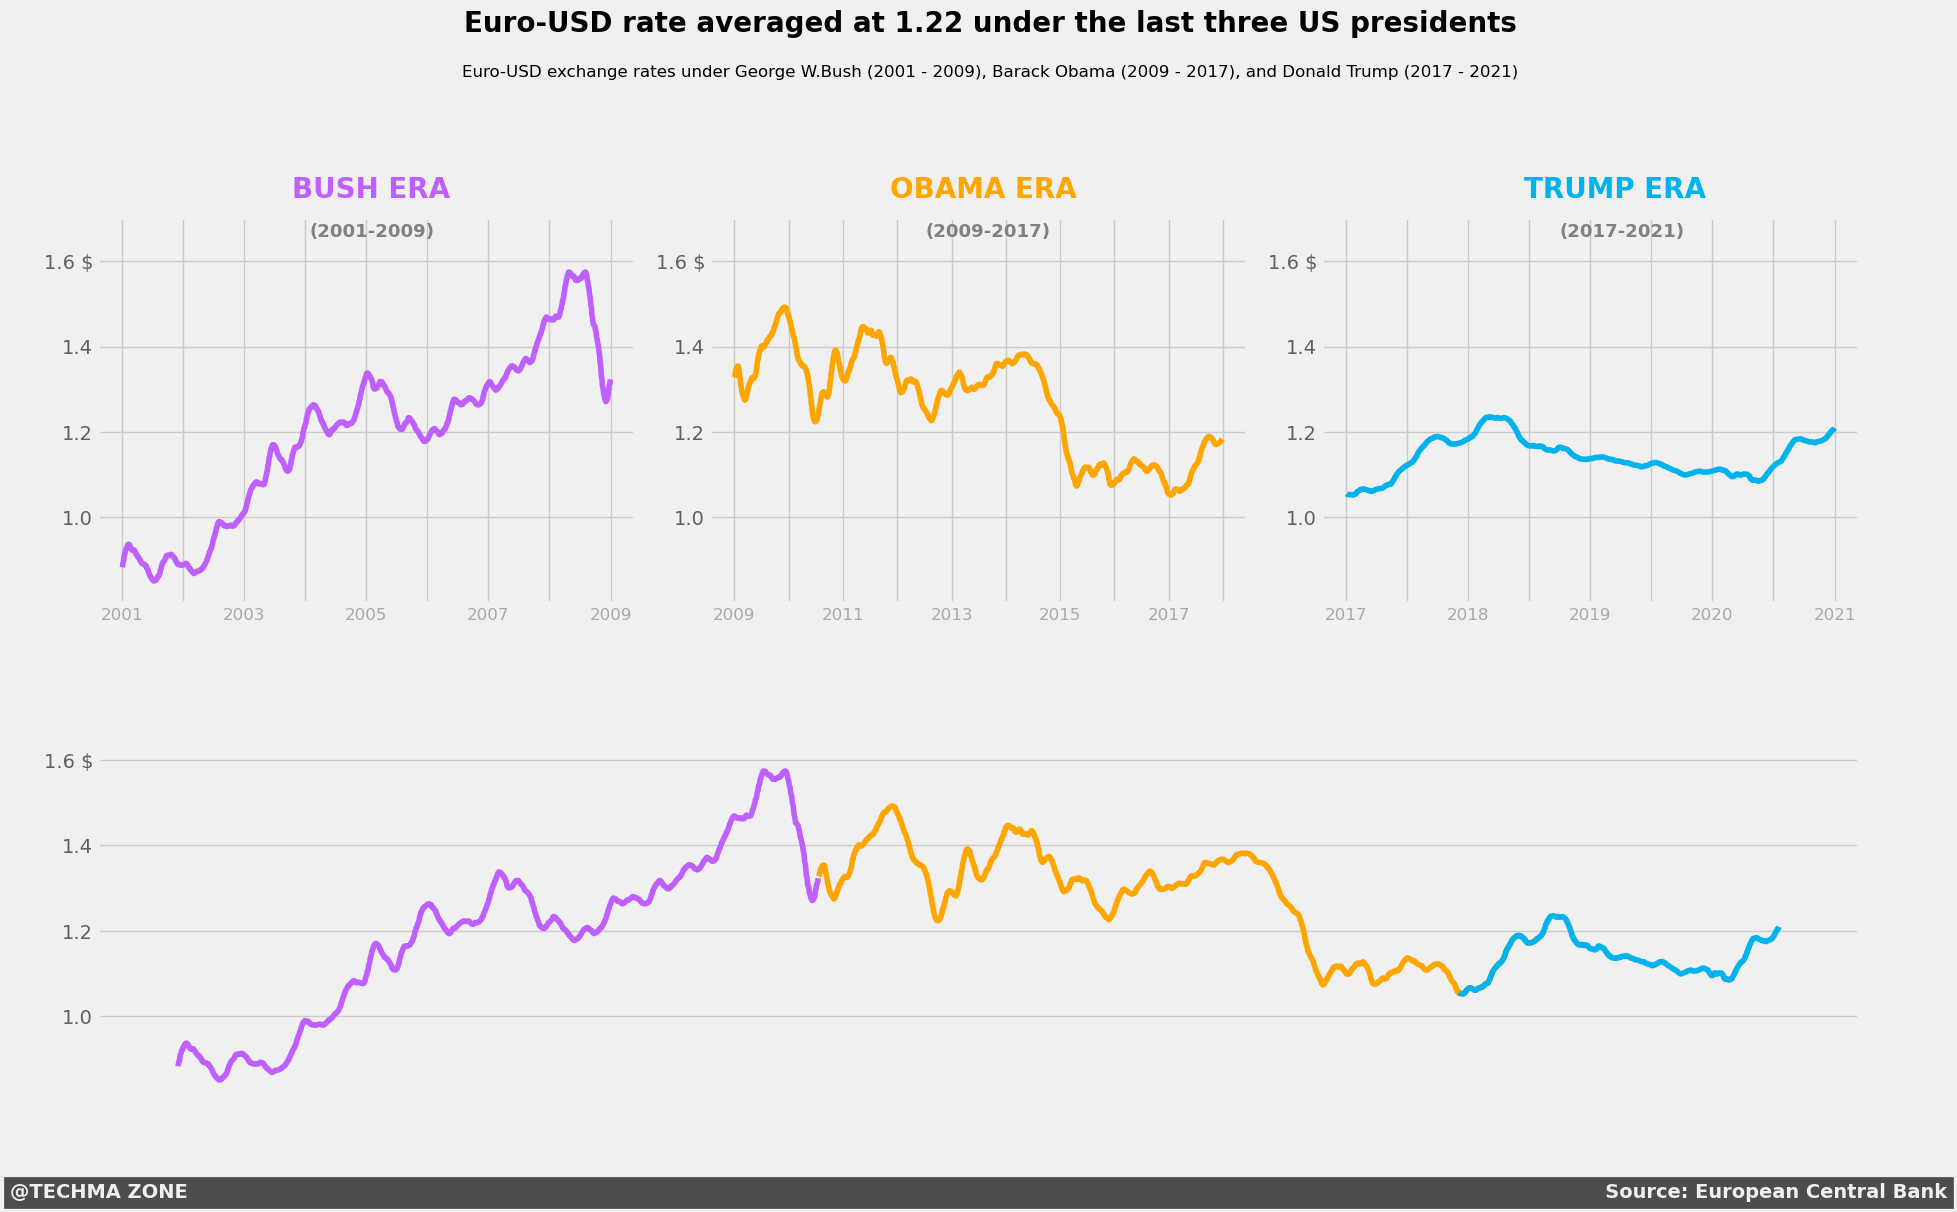

In [26]:
import matplotlib.pyplot as plt
style.use("fivethirtyeight")

plt.figure(figsize = (20,15))


ax1 = plt.subplot(3,3,1) # row , colo , index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

ax4 = plt.subplot(3,1,2)

axes = [ax1,ax2,ax3,ax4]

for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6 $'] , alpha = 0.6)
    

#ax1 bush    
ax1.plot(bush['Time'], bush['rolling_mean'] , color ='#BF5FFF')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'] , alpha = 0.3 , size = 12)
ax1.text(0.11,2.35,"BUSH ERA" , fontsize =20 , weight="bold", color='#BF5FFF',transform =plt.gca().transAxes)
ax1.text(0.12,2.25, "(2001-2009)" ,  fontsize =13 , weight="bold", color='grey',transform =plt.gca().transAxes)
 



#ax2 obama
ax2.plot(obama["Time"], obama["rolling_mean"] , color = '#ffa500')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'], alpha = 0.3 , size = 12)
ax2.text(0.45,2.35,"OBAMA ERA" , fontsize =20 , weight="bold", color='#ffa500',transform =plt.gca().transAxes)
ax2.text(0.47,2.25, "(2009-2017)" ,  fontsize =13 , weight="bold", color='grey',transform =plt.gca().transAxes)


#ax3 Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color = '#00B2EE')
ax3.set_xticklabels(['2017','','2018','','2019','','2020','','2021'], alpha = 0.3 , size = 12)
ax3.text(0.81,2.35,"TRUMP ERA" , fontsize =20 , weight="bold", color='#00B2EE',transform =plt.gca().transAxes)
ax3.text(0.83,2.25, "(2017-2021)" ,  fontsize =13, weight="bold", color='grey',transform =plt.gca().transAxes)


ax4.plot(bush['Time'], bush['rolling_mean'] , color ='#BF5FFF')
ax4.plot(obama["Time"], obama["rolling_mean"] , color = '#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color = '#00B2EE')

ax4.set_xticks([])



plt.figtext(0.5, 1.06, "Euro-USD rate averaged at 1.22 under the last three US presidents", fontsize=20,
            weight='bold', ha='center')
plt.figtext(0.5, 1.03, "Euro-USD exchange rates under George W.Bush (2001 - 2009), Barack Obama (2009 - 2017), "
                      "and Donald Trump (2017 - 2021)", fontsize=12, ha='center')
 
    
ax4.text(-0.05 , -0.25 , "@TECHMA ZONE" + "  "*105+ 'Source: European Central Bank',
        weight = 'bold', color = '#f0f0f0', backgroundcolor = '#4d4d4d', fontsize = 14, transform =plt.gca().transAxes)    
  

plt.tight_layout()
plt.show()

**DISCUSION ABOUT THE ABOVE PLOT**

As we can see in the above plot explaining the Euro-USD exchange rates during the Three US presidents.There can be different reasons on why the rate affected.

1) **George W.Bush Era**:
    The Euro-USD exchange rate was affected by economic policies like tax cuts which made investors lose confidence,                 Geopolitical events such as wars or terrorist attacks causing global economic uncertainty and decisions by the Federal           Reserve on interest rates and monetary policy significantly impacting the exchange rate.
    
2) **Barack Obama Era**: 
   The euro-USD exchange rate was affected by economic policies, geopolitical events, and central bank actions.                    Economic policies, including stimulus measures and trade policy changes, impacted investor confidence. Geopolitical events      such as the European debt crisis and conflicts in the Middle East introduced uncertainty. Central bank actions,                  like decisions on interest rates and quantitative easing, also played a significant role in shaping the exchange rate.
    
3) **Donald Trump Era**:
   The euro-USD exchange rate was influenced by economic policies, geopolitical events, and central bank actions.                  Economic policies, such as tax cuts and trade negotiations, impacted investor sentiment. Geopolitical events,                    including trade tensions with China and diplomatic relations with Europe, introduced market uncertainty. Central bank            actions, particularly decisions by the Federal Reserve on interest rates and monetary policy, also played a significant role    in shaping the exchange rate.


# PLOTTING ON THE SAME PLOT

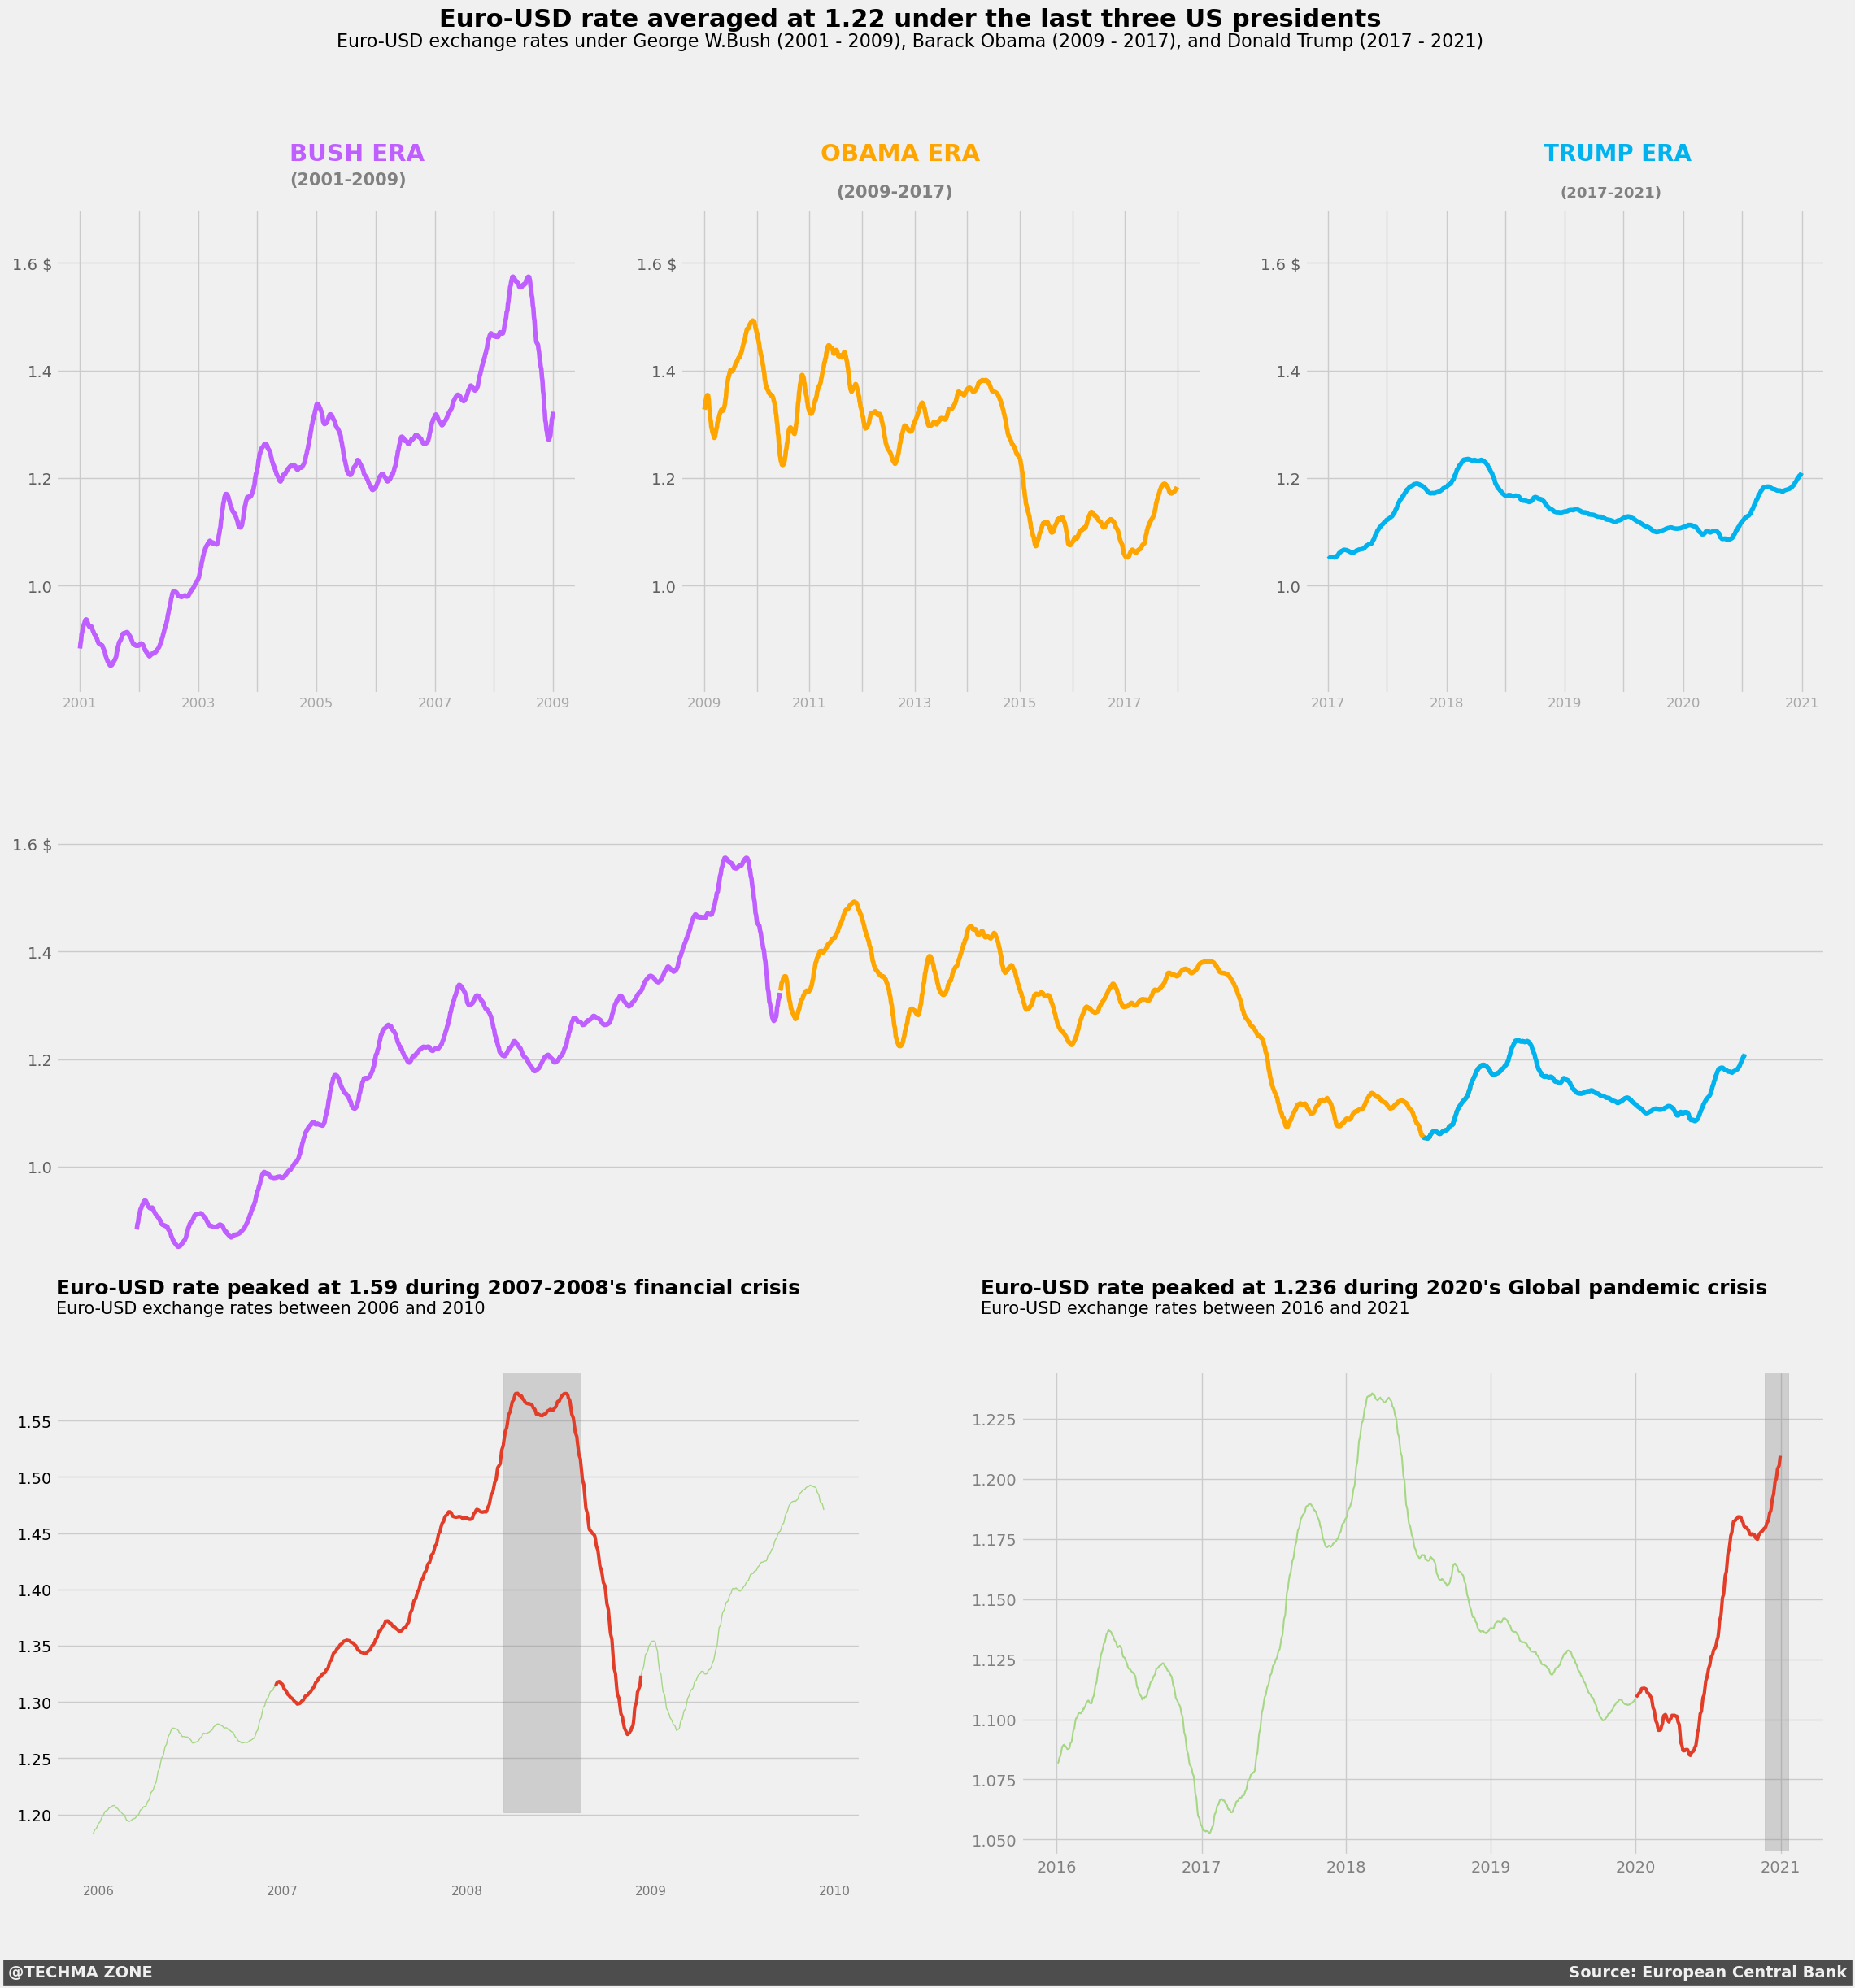

In [29]:
import matplotlib.pyplot as plt
style.use("fivethirtyeight")

plt.figure(figsize = (25,25))


ax1 = plt.subplot(3,3,1) # row , colo , index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,1,2)
ax5 = plt.subplot(3,2,5)
ax6 = plt.subplot(3,2,6)

axes = [ax1,ax2,ax3,ax4]

for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6 $'] , alpha = 0.6)
    

#ax1 bush    
ax1.plot(bush['Time'], bush['rolling_mean'] , color ='#BF5FFF')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'] , alpha = 0.3 , size = 12)
ax1.text(-0.910 ,3.5,"BUSH ERA" , fontsize =21 , weight="bold", color='#BF5FFF',transform =plt.gca().transAxes)
ax1.text(-0.91 ,3.45, "(2001-2009)" ,  fontsize =15 , weight="bold", color='grey',transform =plt.gca().transAxes)
 



#ax2 obama
ax2.plot(obama["Time"], obama["rolling_mean"] , color = '#ffa500')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'], alpha = 0.3 , size = 12)
ax2.text(-0.25,3.5,"OBAMA ERA" , fontsize =21 , weight="bold", color='#ffa500',transform =plt.gca().transAxes)
ax2.text(-0.23,3.425, "(2009-2017)" ,  fontsize =15 , weight="bold", color='grey',transform =plt.gca().transAxes)


#ax3 Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color = '#00B2EE')
ax3.set_xticklabels(['2017','','2018','','2019','','2020','','2021'], alpha = 0.3 , size = 12)
ax3.text(0.65,3.5,"TRUMP ERA" , fontsize =20 , weight="bold", color='#00B2EE',transform =plt.gca().transAxes)
ax3.text(0.67,3.425, "(2017-2021)" ,  fontsize =13, weight="bold", color='grey',transform =plt.gca().transAxes)


ax4.plot(bush['Time'], bush['rolling_mean'] , color ='#BF5FFF')
ax4.plot(obama["Time"], obama["rolling_mean"] , color = '#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color = '#00B2EE')
ax4.set_xticks([])


ax5.plot(financial_crisis['Time'], financial_crisis['rolling_mean'],linewidth=1, color='#A6D785')
ax5.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=3, color='#e23d28')
ax5.set_xticks([])  # Remove x-axis tick marks completely
#ax5.set_yticks([])  # Remove y-axis tick marks completely

x = -1.167
for year in ['2006','2007','2008','2009','2010']:
    ax5.text(x , -0.08, year , alpha =0.5 , fontsize=11, transform =plt.gca().transAxes)
    x += 0.22888   

ax5.text(-1.2 , 1.16, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight = 'bold', fontsize = 18 , transform =plt.gca().transAxes)    
ax5.text(-1.20 , 1.12 , "Euro-USD exchange rates between 2006 and 2010", fontsize = 15 , transform =plt.gca().transAxes)        
ax5.axvspan(xmin = pd.to_datetime("2008-04-1") , xmax = pd.to_datetime("2008-09-1"), ymin = 0.09,
       alpha = 0.3 , color = 'grey')    
    

    
    
ax6.plot(corona_crisis['Time'], corona_crisis['rolling_mean'],
        linewidth=1.5, color='#A6D785')

ax6.plot(corona_crisis_20['Time'], corona_crisis_20['rolling_mean'],
        linewidth=3, color='#e23d28')



ax6.tick_params(axis='x', which='both', colors='grey')
ax6.tick_params(axis='y', which='both', colors='grey') 
ax6.text(-0.05 , 1.16 , "Euro-USD rate peaked at 1.236 during 2020's Global pandemic crisis  ",weight = 'bold' , fontsize = 18, transform =plt.gca().transAxes)    
ax6.text(-0.05 , 1.12 , "Euro-USD exchange rates between 2016 and 2021", fontsize = 15 , transform =plt.gca().transAxes)    
ax6.axvspan(xmin = pd.to_datetime("2021-01-21") , xmax = pd.to_datetime("2020-11-21"), ymin = 0.01,
           alpha = 0.3 , color = 'grey')       


plt.figtext(0.5, 0.97, "Euro-USD rate averaged at 1.22 under the last three US presidents", fontsize=22,
            weight='bold', ha='center')
plt.figtext(0.5, 0.96, "Euro-USD exchange rates under George W.Bush (2001 - 2009), Barack Obama (2009 - 2017), "
                      "and Donald Trump (2017 - 2021)", fontsize=16, ha='center')
 
    
plt.figtext(-1.26 , -0.25 , "@TECHMA ZONE" + "  "*129+ 'Source: European Central Bank',
        weight = 'bold', color = '#f0f0f0', backgroundcolor = '#4d4d4d', fontsize = 14, transform =plt.gca().transAxes)    
plt.tight_layout()
plt.show()

# CONCLUSION


In conclusion, our data storytelling on the euro-USD exchange rates offers insights into key historical events and their impacts. During the coronavirus pandemic, we observed significant fluctuations in the exchange rate, with 2020 data deviating notably from the 2016-2019 baseline. Economic uncertainty, divergent policy responses, and global market dynamics played pivotal roles in shaping these fluctuations. Similarly, during the 2007-2008 financial crisis, the euro-USD exchange rate experienced profound shifts, driven by economic turmoil, financial market instability, and central bank actions. The comparison across the last three US presidents illustrates how geopolitical events, economic policies, and central bank decisions influence currency valuation over time. By analyzing these trends and understanding the underlying factors, we gain valuable insights into the complex dynamics shaping the euro-USD exchange rate.


